In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('_data/Kvam_2019_orientation_judgments_data.csv')
data = data[data['isCued'] == 0].reset_index(drop=True)

CDM = pd.read_csv('Kvam_2019_best_estimation.csv', index_col=0)
CCDM = pd.read_csv('Kvam_2019_collapsing_best_estimation.csv', index_col=0)

In [3]:
CCDM.groupby(by='isSpeed')['b0'].mean()

isSpeed
0    2.668243
1    2.523736
Name: b0, dtype: float64

In [4]:
CCDM.groupby(by='isSpeed')['lambda'].mean()

isSpeed
0    0.628022
1    1.555440
Name: lambda, dtype: float64

In [5]:
CDM.groupby(by='isSpeed')['threshold'].mean()

isSpeed
0    2.324515
1    1.648194
Name: threshold, dtype: float64

In [6]:
CDM_BIC = []
CCDM_BIC = []

model_select = {'sbj': [],
                'isSpeed':[],
                'jitter':[],
                'p_fix':[],
                'p_col':[]}

for par in data.Participant.unique():
    data_sbj = data[data['Participant'] == par].reset_index(drop=True)
    CDM_sbj = CDM[CDM['sbj'] == par].reset_index(drop=True)
    CCDM_sbj = CCDM[CCDM['sbj'] == par].reset_index(drop=True)
    for sp in range(2):
        for jit in [15, 30, 45]:
            cond_data = data_sbj[(data_sbj['isSpeed']==sp) & (data_sbj['jitter']==jit)].reset_index(drop=True)
            cond_CDM = CDM_sbj[(CDM_sbj['isSpeed']==sp) & (CDM_sbj['jitter']==jit)].reset_index(drop=True)
            cond_CCDM = CCDM_sbj[(CCDM_sbj['isSpeed']==sp) & (CCDM_sbj['jitter']==jit)].reset_index(drop=True)
            CDM_BIC.append(cond_CDM['G2'][0]+ 4*np.log(cond_data.shape[0]))
            CCDM_BIC.append(cond_CCDM['G2'][0]+ 5*np.log(cond_data.shape[0]))
            
            model_select['sbj'].append(par)
            model_select['isSpeed'].append(sp)
            model_select['jitter'].append(jit)
            denum = np.exp(-0.5*CDM_BIC[-1]) + np.exp(-0.5*CCDM_BIC[-1])
            model_select['p_fix'].append(np.exp(-0.5*CDM_BIC[-1])/denum)
            model_select['p_col'].append(np.exp(-0.5*CCDM_BIC[-1])/denum)
            
# #             if CDM_BIC[-1] > CCDM_BIC[-1]:
# #                 print(par, sp, jit, CDM_BIC[-1], CCDM_BIC[-1])
#             if cond_CDM['G2'][0] > cond_CCDM['G2'][0]:
#                 print(par, sp, jit, CDM_BIC[-1], CCDM_BIC[-1], 
#                       np.exp(-0.5*CCDM_BIC[-1])/(np.exp(-0.5*CDM_BIC[-1]) + np.exp(-0.5*CCDM_BIC[-1])))

In [7]:
model_select = pd.DataFrame(model_select)

In [7]:
print(' G2: ', CDM.G2.sum(), CCDM.G2.sum())
print('BIC: ', np.sum(CDM_BIC), np.sum(CCDM_BIC))

 G2:  -22788.48301792416 -23576.223336897005
BIC:  -21525.257414508793 -21997.191332627794


In [8]:
print(' G2: ', CDM.G2.sum(), CCDM.G2.sum())
print('BIC: ', np.sum(CDM_BIC), np.sum(CCDM_BIC))

 G2:  -22788.48301792416 -23576.223336897005
BIC:  -21525.257414508793 -21997.191332627794


In [6]:
data[(data['isSpeed']==1) & (data['jitter']==15)].corr()

,Participant,isSpeed,isCued,jitter,jitterLevel,cueDeflections,cueOrientation,targetOrientation,response,deviation,absoluteDeviation,RT,points
Participant,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.009264,-0.019394,0.014305,0.115549,-0.267859,0.159256
isSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isCued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jitterLevel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cueDeflections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cueOrientation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetOrientation,0.009264,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.757640,-0.023839,-0.002155,0.086290,-0.065381
response,-0.019394,NaN,NaN,NaN,NaN,NaN,NaN,0.757640,1.000000,0.027317,-0.094740,0.083527,0.061751
deviation,0.014305,NaN,NaN,NaN,NaN,NaN,NaN,-0.023839,0.027317,1.000000,-0.088123,0.029259,0.016502


In [7]:
data[(data['isSpeed']==1) & (data['jitter']==30)].corr()

,Participant,isSpeed,isCued,jitter,jitterLevel,cueDeflections,cueOrientation,targetOrientation,response,deviation,absoluteDeviation,RT,points
Participant,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.020484,-0.016896,-0.037623,0.117243,-0.269956,0.147809
isSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isCued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jitterLevel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cueDeflections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cueOrientation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetOrientation,0.020484,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.522798,-0.039727,-0.020908,-0.038177,0.034151
response,-0.016896,NaN,NaN,NaN,NaN,NaN,NaN,0.522798,1.000000,-0.031347,-0.041782,-0.010309,0.077787
deviation,-0.037623,NaN,NaN,NaN,NaN,NaN,NaN,-0.039727,-0.031347,1.000000,-0.084873,0.056301,-0.007033


In [8]:
data[(data['isSpeed']==1) & (data['jitter']==45)].corr()

,Participant,isSpeed,isCued,jitter,jitterLevel,cueDeflections,cueOrientation,targetOrientation,response,deviation,absoluteDeviation,RT,points
Participant,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.020812,-0.105655,-0.018639,0.057895,-0.212028,0.120263
isSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isCued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jitterLevel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cueDeflections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cueOrientation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetOrientation,-0.020812,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.356224,-0.014933,-0.021826,0.036801,-0.035142
response,-0.105655,NaN,NaN,NaN,NaN,NaN,NaN,0.356224,1.000000,-0.045936,-0.034797,0.031614,0.021057
deviation,-0.018639,NaN,NaN,NaN,NaN,NaN,NaN,-0.014933,-0.045936,1.000000,-0.064321,0.000211,0.046078


In [11]:
model_select.sort_values(by='p_fix').head(20)

,sbj,isSpeed,jitter,p_fix,p_col
57,190,1,15,4.893140e-24,1.000000
30,140,0,15,5.485145e-24,1.000000
33,140,1,15,4.571962e-22,1.000000
39,150,1,15,1.423506e-19,1.000000
45,170,1,15,1.289100e-12,1.000000
36,150,0,15,1.013862e-11,1.000000
21,120,1,15,2.179383e-11,1.000000
9,101,1,15,3.584264e-09,1.000000
3,100,1,15,5.863596e-09,1.000000
42,170,0,15,3.844483e-05,0.999962


In [13]:
data.Participant.unique().shape

(12,)

In [14]:
import seaborn as sns

<AxesSubplot: >

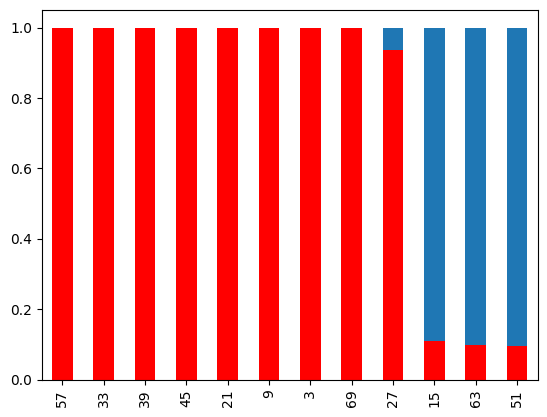

In [35]:
df = model_select[(model_select['isSpeed']==1) & (model_select['jitter']==15)].sort_values(by='p_fix')
ax = (df['p_fix'] + (df['p_col'])).plot(kind='bar')
df['p_col'].plot(kind='bar', color='red', ax=ax)

<AxesSubplot: >

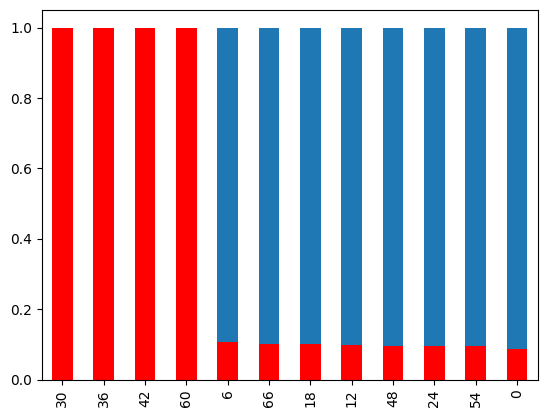

In [36]:
df = model_select[(model_select['isSpeed']==0) & (model_select['jitter']==15)].sort_values(by='p_fix')
ax = (df['p_fix'] + (df['p_col'])).plot(kind='bar')
df['p_col'].plot(kind='bar', color='red', ax=ax)

<AxesSubplot: >

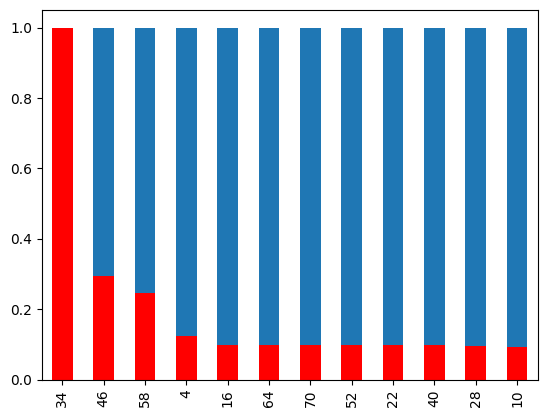

In [37]:
df = model_select[(model_select['isSpeed']==1) & (model_select['jitter']==30)].sort_values(by='p_fix')
ax = (df['p_fix'] + (df['p_col'])).plot(kind='bar')
df['p_col'].plot(kind='bar', color='red', ax=ax)

<AxesSubplot: >

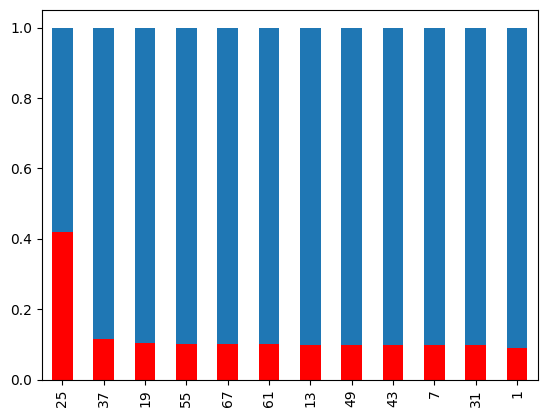

In [38]:
df = model_select[(model_select['isSpeed']==0) & (model_select['jitter']==30)].sort_values(by='p_fix')
ax = (df['p_fix'] + (df['p_col'])).plot(kind='bar')
df['p_col'].plot(kind='bar', color='red', ax=ax)

<AxesSubplot: >

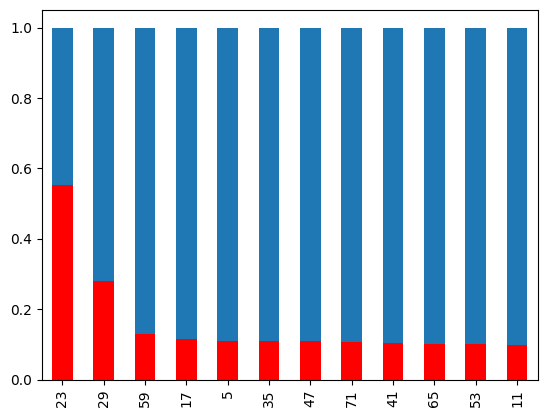

In [39]:
df = model_select[(model_select['isSpeed']==1) & (model_select['jitter']==45)].sort_values(by='p_fix')
ax = (df['p_fix'] + (df['p_col'])).plot(kind='bar')
df['p_col'].plot(kind='bar', color='red', ax=ax)

<AxesSubplot: >

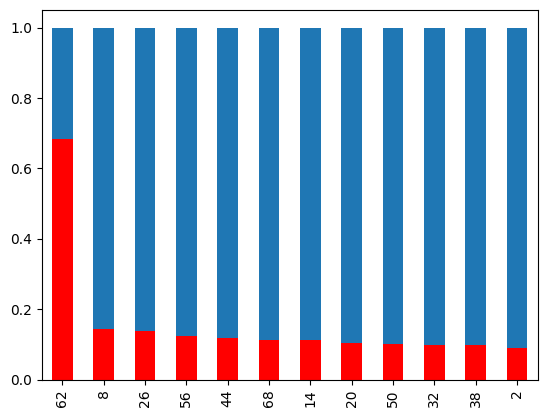

In [40]:
df = model_select[(model_select['isSpeed']==0) & (model_select['jitter']==45)].sort_values(by='p_fix')
ax = (df['p_fix'] + (df['p_col'])).plot(kind='bar')
df['p_col'].plot(kind='bar', color='red', ax=ax)